# 作业要求：
1. 把guazi_bj（北京）、guazi_gz（广州）、guazi_sh（上海）、guazi_sz（深圳）二手车的数据归类在一个DataFrame中。
2. 新增车辆使用年份（use_year）与保值率（hedge_rate）两个字段。其中使用年份的计算是把当前的时间减去购买的时间，然后再转换成年；保值率的计算是将二手车的价格/新车的价格。
2. 把二手车使用年份与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。
3. 把二手车的行驶距离与保值率（二手车价/新车价格）绘制成散点图，观察他们的分布情况。

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [54]:
guazi_bj = pd.read_csv("guazi_bj.csv")
guazi_gz = pd.read_csv("guazi_gz.csv")
guazi_sh = pd.read_csv("guazi_sh.csv")
guazi_sz = pd.read_csv("guazi_sz.csv")

guazi = pd.concat([guazi_bj,guazi_gz,guazi_sh,guazi_sz],axis=0)
def get_use_year(value):
    if isinstance(value,str):
        datetime_value = datetime.strptime(value,"%Y-%m")
        now = datetime.now()
        yeardelay = (now - datetime_value).total_seconds()/60/60/24/30/12
        return yeardelay
    return np.NAN
guazi['use_year'] = guazi['buy_time'].apply(get_use_year)
guazi['hedge_rate'] = guazi['es_price'] / guazi['new_price']
guazi[['use_year','km','hedge_rate']].head()

,use_year,km,hedge_rate
0,4.890745,3.82,0.615385
1,3.537967,2.35,0.600000
2,7.174078,6.67,0.426829
3,6.493523,11.83,0.356295
4,5.649078,8.95,0.469314


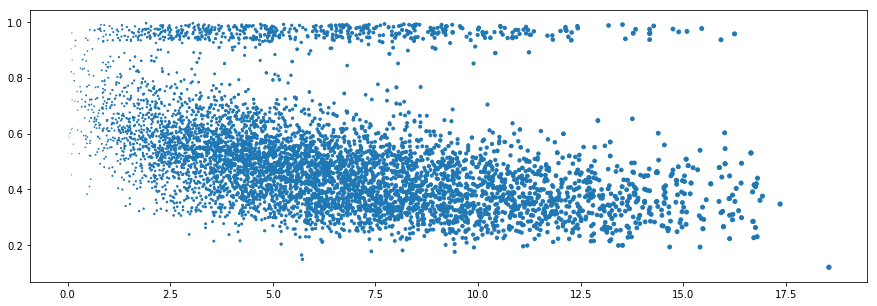

In [55]:
plt.figure(figsize=(15,5))
plt.scatter(guazi['km'],guazi['hedge_rate'],s=guazi['km'])

Text(0, 0.5, 'ledge rate')

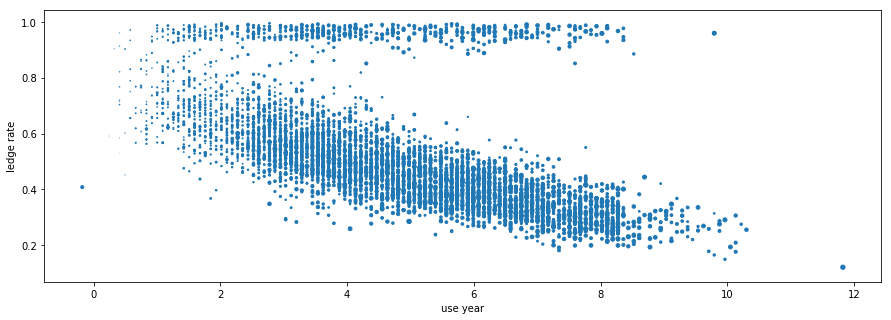

In [59]:
plt.figure(figsize=(15,5))
plt.scatter(guazi['use_year'],guazi['hedge_rate'],s=guazi['km'])
plt.xlabel("use year")
plt.ylabel("hedge rate")

In [67]:
guazi[(guazi['hedge_rate'] > 0.9) & (guazi['use_year'] > 3)][['new_price','es_price','use_year','km']].head()

,new_price,es_price,use_year,km
21,10.19,10.03,5.393523,7.21
24,5.30,5.19,5.315745,3.42
30,3.30,3.15,7.510190,11.26
34,10.10,9.70,4.046301,7.21
39,10.24,10.00,6.160190,6.86


In [70]:
guazi[(guazi['hedge_rate'] > 0.9) & (guazi['use_year'] > 6)][['new_price','es_price','use_year','use_year']].head()

,new_price,es_price,use_year,use_year
30,3.30,3.15,7.510190,7.510190
39,10.24,10.00,6.160190,6.160190
80,9.11,8.92,7.679634,7.679634
90,7.57,7.32,6.749078,6.749078
124,7.98,7.61,7.935190,7.935190


# 观察结果：
1. 通过以上分析，我们可以看到汽车的保值率是随着使用年份和行驶公里数的增加呈现线性下降的。
2. 有一部分数据引起我们的注意，就是保值率大于0.9，并且使用年份和行驶公里数都比较大的数据，我们可以看出这类数据基本上可以算是异常数据了，因此以后在分析的时候就可以处理掉这部分数据了。
